In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from scipy import stats
from scipy.stats import norm
plt.rcParams.update({'font.size': 10, 'figure.figsize': (6, 6)})


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('data/credit_card/creditcard.csv')
# df = df[df['Amount'] < 5000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

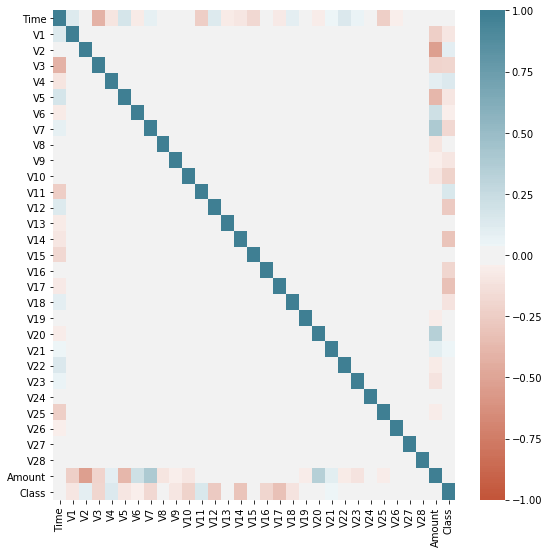

In [31]:
f, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))

In [14]:
df['Amount'].describe()

count    284752.000000
mean         86.877386
std         220.369427
min           0.000000
25%           5.580000
50%          22.000000
75%          77.050000
max        4959.850000
Name: Amount, dtype: float64

In [4]:
print(df['Amount'].quantile(0.995))
print(df['Amount'][df['Amount'] > 5000].count())
#df.sort_values(by = 'Amount', ascending = False)[:10]
#df[(df['Amount'] > 2000) & (df['Class'] == 1)]

1456.9876999999885
55


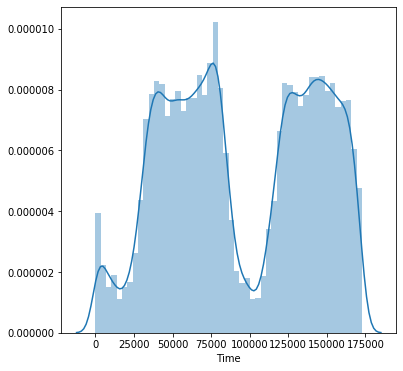

In [20]:
sns.distplot(df['Time'])

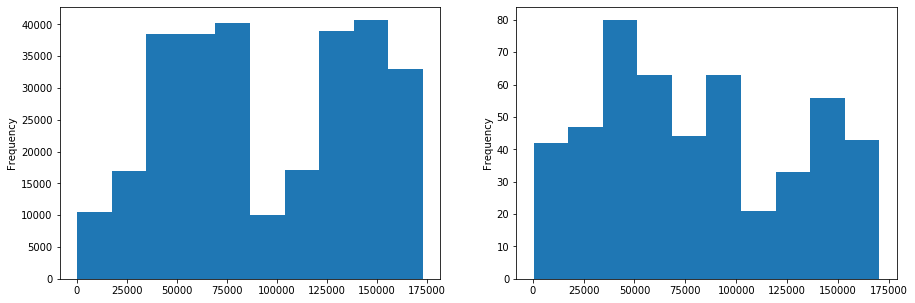

In [32]:
# Not so dependent on time
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
df['Time'][df['Class'] == 0].plot(kind='hist', ax = ax[0])
df['Time'][df['Class'] == 1].plot(kind='hist', ax = ax[1])
# grid = sns.FacetGrid(df, col='Class', height=5)
# grid.map(plt.hist, 'Time')

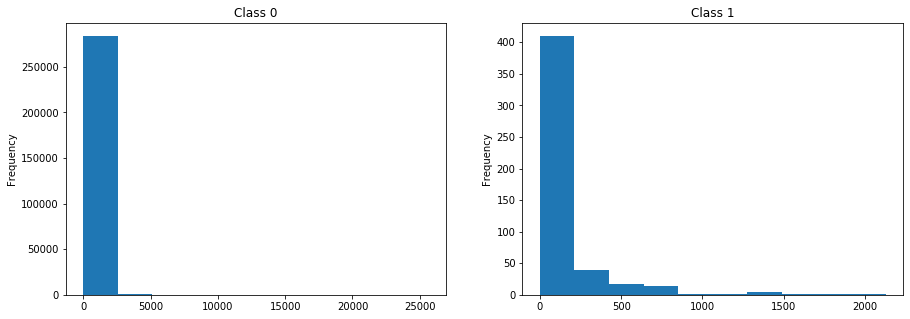

In [34]:
# Not so dependent on amount
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
df['Amount'][df['Class'] == 0].plot(kind='hist', ax = ax[0], title='Class 0')
df['Amount'][df['Class'] == 1].plot(kind='hist', ax = ax[1], title = 'Class 1')

In [37]:
# Robust Feature scaling
# from sklearn.preprocessing import RobustScaler
# df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
# df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
# df.drop(['Time', 'Amount'], axis=1, inplace=True)

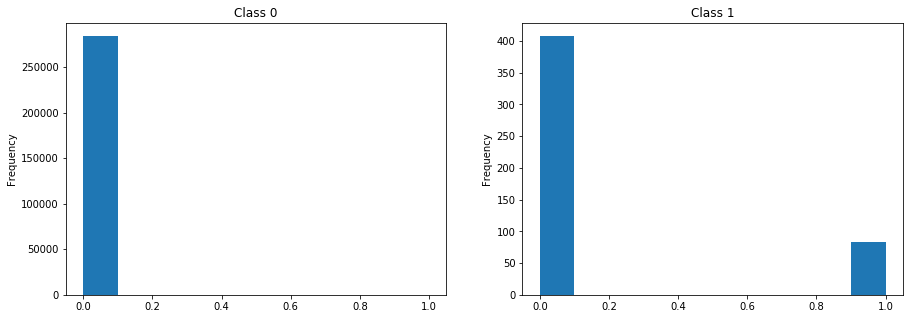

In [48]:
# Normal KNN wouldnt work
from sklearn.cluster import MiniBatchKMeans
df['cluster'] = MiniBatchKMeans(n_clusters = 2).fit_predict(df.drop('Class', axis = 1))
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
df['cluster'][df['Class'] == 0].plot(kind='hist', ax = ax[0], title='Class 0')
df['cluster'][df['Class'] == 1].plot(kind='hist', ax = ax[1], title='Class 1')
df.drop('cluster', axis = 1, inplace=True)

### Train Test Split

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import RobustScaler

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)

### Logistic Regression with Near Miss (Undersampling)

In [40]:
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report

In [44]:
#log_reg = make_pipeline(NearMiss(), LogisticRegression())
log_reg = LogisticRegression(C=0.1)
X_train_res, y_train_res = NearMiss().fit_resample(X_train, y_train)
print(X_train_res.shape)
print("cv f1: ", np.mean(cross_val_score(log_reg, X_train_res, y_train_res, scoring='f1')))

(788, 30)
cv f1:  0.9502003088940428


/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of a

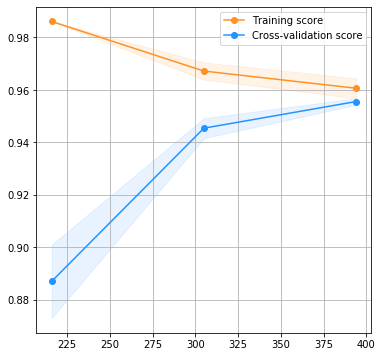

In [52]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(log_reg, X_train_res, y_train_res, cv = 2, train_sizes=np.linspace(0.1, 1.0, 5), return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
         label="Cross-validation score")

plt.grid(True)
plt.legend(loc="best")
plt.show()

In [33]:
log_reg.fit(X_train_res, y_train_res)
log_reg_pipeline = make_pipeline(rob_scaler, log_reg)
y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)

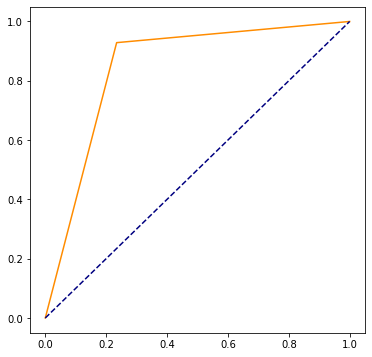

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     56864
           1       0.01      0.93      0.01        98

    accuracy                           0.77     56962
   macro avg       0.50      0.85      0.44     56962
weighted avg       1.00      0.77      0.87     56962

